In [1]:
from io import StringIO
import pandas as pd

csv_data = StringIO("""
CustomerID,Gender,Age,MonthlyCharges,Tenure,ContractType,Churn
C001,Male,45,70,24,Month-to-Month,Yes
C002,Female,30,55,12,One-Year,No
C003,Male,60,90,36,Two-Year,No
C004,Female,25,40,6,Month-to-Month,Yes
C005,Male,50,80,18,One-Year,Yes
C006,Female,35,60,20,Two-Year,No
C007,Male,28,45,8,Month-to-Month,Yes
C008,Female,42,75,30,One-Year,No
""")

df = pd.read_csv(csv_data)
df


,CustomerID,Gender,Age,MonthlyCharges,Tenure,ContractType,Churn
0,C001,Male,45,70,24,Month-to-Month,Yes
1,C002,Female,30,55,12,One-Year,No
2,C003,Male,60,90,36,Two-Year,No
3,C004,Female,25,40,6,Month-to-Month,Yes
4,C005,Male,50,80,18,One-Year,Yes
5,C006,Female,35,60,20,Two-Year,No
6,C007,Male,28,45,8,Month-to-Month,Yes
7,C008,Female,42,75,30,One-Year,No


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      8 non-null      object
 1   Gender          8 non-null      object
 2   Age             8 non-null      int64 
 3   MonthlyCharges  8 non-null      int64 
 4   Tenure          8 non-null      int64 
 5   ContractType    8 non-null      object
 6   Churn           8 non-null      object
dtypes: int64(3), object(4)
memory usage: 580.0+ bytes


,Age,MonthlyCharges,Tenure
count,8.000000,8.000000,8.000000
mean,39.375000,64.375000,19.250000
std,12.070478,17.410485,10.525479
min,25.000000,40.000000,6.000000
25%,29.500000,52.500000,11.000000
50%,38.500000,65.000000,19.000000
75%,46.250000,76.250000,25.500000
max,60.000000,90.000000,36.000000


In [3]:
churn_rate = df["Churn"].value_counts(normalize=True) * 100
churn_rate


Churn
Yes    50.0
No     50.0
Name: proportion, dtype: float64

In [4]:
df.groupby("ContractType")["Churn"].value_counts(normalize=True).unstack() * 100


Churn,No,Yes
ContractType,,
Month-to-Month,NaN,100.000000
One-Year,66.666667,33.333333
Two-Year,100.000000,NaN


In [5]:
df.groupby("Churn")["Tenure"].mean()


Churn
No     24.5
Yes    14.0
Name: Tenure, dtype: float64

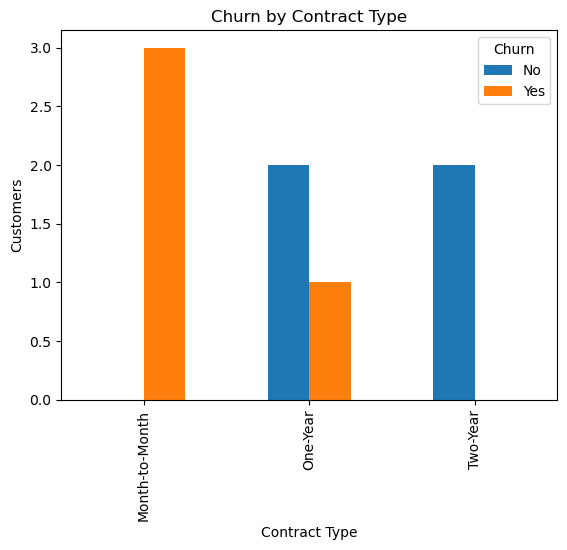

In [6]:
import matplotlib.pyplot as plt

df.groupby("ContractType")["Churn"].value_counts().unstack().plot(kind="bar")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customers")
plt.show()
print("test")
print("test")

In [14]:
print("test")


test


In [15]:
type(df)


pandas.core.frame.DataFrame

In [16]:
df["Churn"]


0    Yes
1     No
2     No
3    Yes
4    Yes
5     No
6    Yes
7     No
Name: Churn, dtype: object

In [17]:
df["Churn"].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
['Yes' 'No']

['YesNo']

In [19]:
df["Churn"] = df["Churn"].astype(str).str.strip()

df["Churn_Num"] = df["Churn"].map({
    "Yes": 1,
    "No": 0
})

df[["Churn", "Churn_Num"]]

,Churn,Churn_Num
0,Yes,1
1,No,0
2,No,0
3,Yes,1
4,Yes,1
5,No,0
6,Yes,1
7,No,0


In [20]:
df["Churn"].value_counts()


Churn
Yes    4
No     4
Name: count, dtype: int64

In [21]:
df["Churn"].value_counts(normalize=True) * 100


Churn
Yes    50.0
No     50.0
Name: proportion, dtype: float64

In [22]:
df.groupby("ContractType")["Churn_Num"].mean() * 100

ContractType
Month-to-Month    100.000000
One-Year           33.333333
Two-Year            0.000000
Name: Churn_Num, dtype: float64

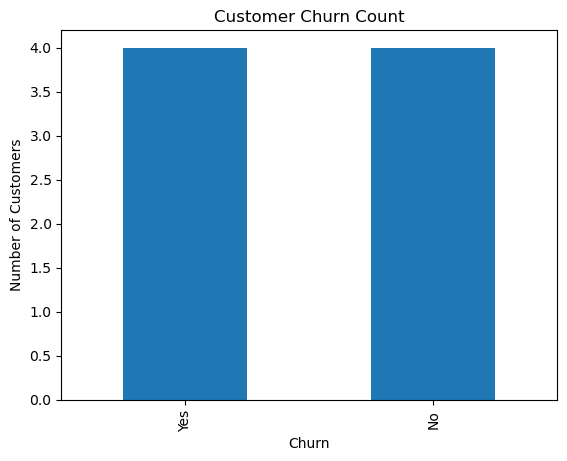

In [23]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Customer Churn Count")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


In [25]:
print(df_model.head())


   Contract_Num  Churn_Num
0             0          1
1             1          0
2             2          0
3             0          1
4             1          1


In [26]:
X = df_model[["Contract_Num"]]
y = df_model["Churn_Num"]

X.head(), y.head()


(   Contract_Num
 0             0
 1             1
 2             2
 3             0
 4             1,
 0    1
 1    0
 2    0
 3    1
 4    1
 Name: Churn_Num, dtype: int64)

In [27]:
from sklearn.model_selection import train_test_split
X = df_model[["Contract_Num"]]
y = df_model["Churn_Num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [28]:
X_train.shape, X_test.shape


((6, 1), (2, 1))

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
model.score(X_test, y_test)

0.5

In [31]:
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 0])

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[1, 1],
       [0, 0]])

In [33]:
model.coef_


array([[-0.96328372]])

In [34]:
# Month-to-month customer
model.predict([[0]])

# Two-year contract customer
model.predict([[2]])


C:\Users\Janu Dhanya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Janu Dhanya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])